# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [105]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [106]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [107]:
# I tried the string method but it was making the site lag a little so I dropped that method.

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

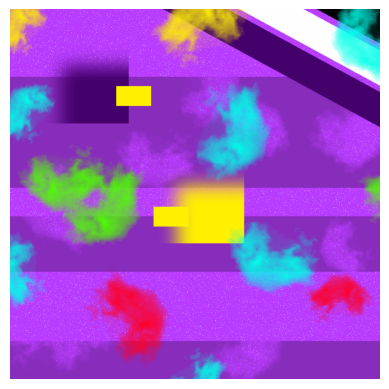

In [109]:
img_path = '/content/drive/MyDrive/Image/FFT.jpg'

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')


In [110]:
print(np.array(img).shape)

(1080, 1080, 4)


In [111]:
arr = np.array(img)  # shape: (H, W, 4)

# ignore alpha channel
if arr.shape[2] == 4:
    arr = arr[:, :, :3]

# Apply weighted sum
gray = (0.299 * arr[:, :, 0]
        + 0.587 * arr[:, :, 1]
        + 0.114 * arr[:, :, 2])


print(gray.shape)

(1080, 1080)


(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

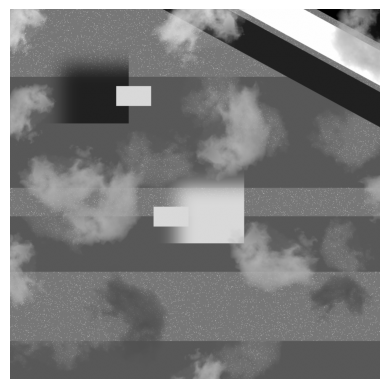

In [112]:
plt.imshow(gray, cmap='gray')
plt.axis('off')

(1080, 1080)


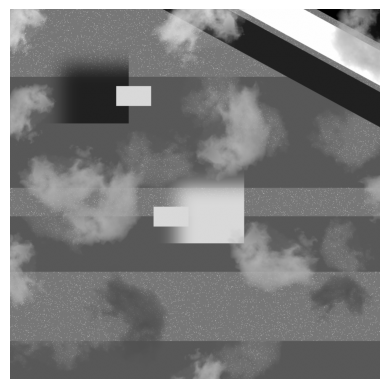

In [113]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)        # Using CV method

plt.imshow(gray_img, cmap='gray')
plt.axis('off')

print(gray_img.shape)


In [114]:
print(gray[100, 100])
print(gray_img[100, 100])


0.4655647
0.4655647


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [115]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [116]:
# FFT

f = np.fft.fft2(gray)
f_shift = np.fft.fftshift(f)

In [117]:
# Magnitude and phase calculation

magnitude = 20*np.log(np.abs(f_shift)+1)
phase = np.angle(f_shift)

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

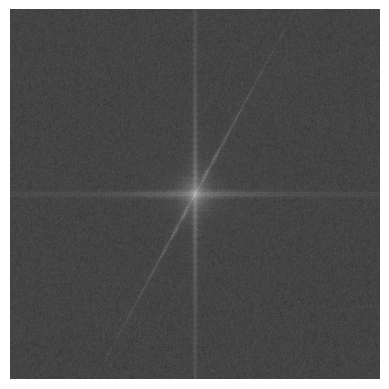

In [118]:
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [119]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [120]:
# Mask creation

rows, cols = gray.shape
crow, ccol = rows/2, cols/2
radius = 80

mask_lpf = np.zeros((rows, cols), np.uint8)

#normal mask
cv2.circle(mask_lpf, (int(ccol), int(crow)), radius, 1, -1)


# square mask
half = 25
mask_lpf_square = cv2.rectangle(mask_lpf, (int(ccol-half), int(crow-half)), (int(ccol+half), int(crow+half)), 1, -1)

mask_hpf = 1 - mask_lpf

In [121]:
f_lpf = f_shift * mask_lpf
ishift_lpf = np.fft.ifftshift(f_lpf)
img_back_lpf = np.fft.ifft2(ishift_lpf)
img_back_lpf = np.abs(img_back_lpf)

f_lpf_square = f_shift * mask_lpf_square
ishift_lpf_square = np.fft.ifftshift(f_lpf_square)
img_back_lpf_square = np.fft.ifft2(ishift_lpf_square)
img_back_lpf_square = np.abs(img_back_lpf_square)

f_hpf = f_shift * mask_hpf
ishift_hpf = np.fft.ifftshift(f_hpf)
img_back_hpf = np.fft.ifft2(ishift_hpf)
img_back_hpf = np.abs(img_back_hpf)

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

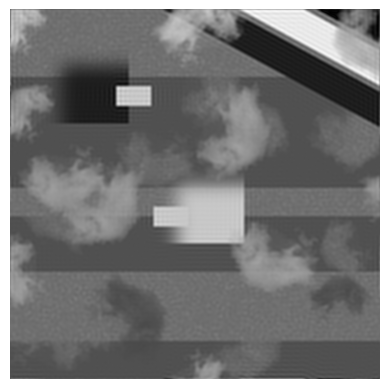

In [122]:
plt.imshow(img_back_lpf, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

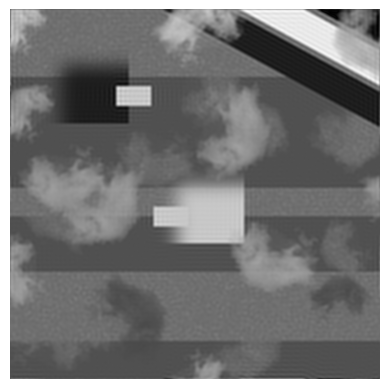

In [123]:
plt.imshow(img_back_lpf_square, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

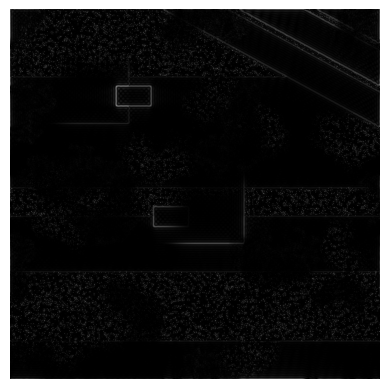

In [124]:
plt.imshow(img_back_hpf, cmap='gray')
plt.axis('off')

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [125]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

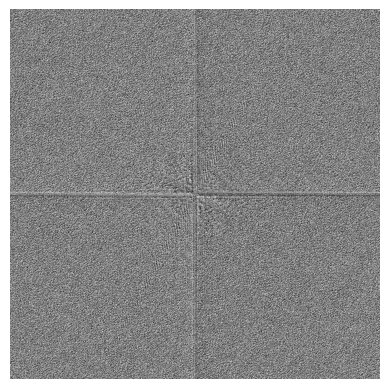

In [126]:
phase_only =(f_shift / np.abs(f_shift))
plt.imshow(phase, cmap='gray')
plt.axis('off')

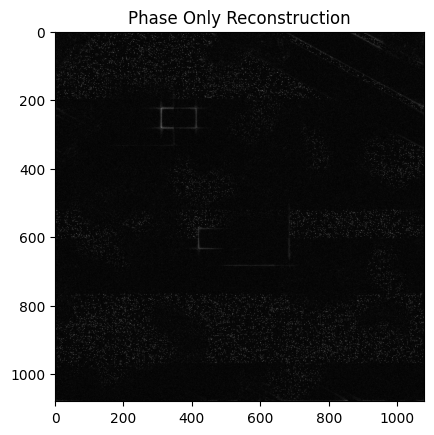

In [127]:
# Set magnitude = 1 everywhere
mag = np.ones_like(phase)
phase_only =(f_shift / np.abs(f_shift))


# Combine back into complex spectrum
f_phase_only = mag * phase_only
# f_phase_only = mag * np.exp(1j * phase) #other formula

# Inverse FFT
f_ishift = np.fft.ifftshift(f_phase_only)
img_phase = np.fft.ifft2(f_ishift)
img_phase = np.abs(img_phase)

plt.imshow(img_phase, cmap='gray')
plt.title('Phase Only Reconstruction')
plt.show()


In [128]:
# The differece between these two is that the angle method uses the theta from the complex f_shift that is exp(i*theta) and
# give us the phase which eventually is a Real number but this new method calculated the complex phase since f_shift is a complex number.

# And due to this same logic, while reconstructing the image we have to convert the initially mentioned phase in a complex number first to use that.
# I have mentioned both the formulas while reconstructing.

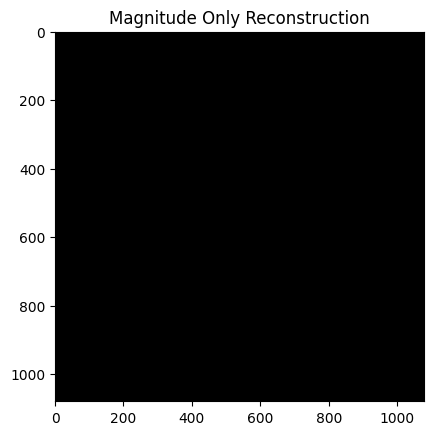

In [129]:
mag_only = np.abs(f_shift)

# phase = np.angle(f_shift)

zero_phase = np.zeros_like(phase)

# Build complex spectrum: mag * e^{j*0} = mag
f_mag_only = magnitude * np.exp(1j * zero_phase)

# Inverse FFT
f_ishift = np.fft.ifftshift(f_mag_only)
img_mag = np.fft.ifft2(f_ishift)
img_mag = np.abs(img_mag)

plt.imshow(img_mag, cmap='gray')
plt.title('Magnitude Only Reconstruction')
plt.show()


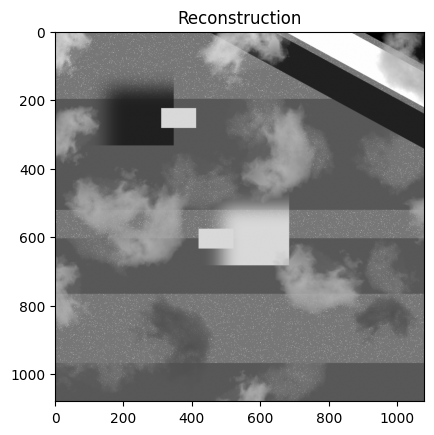

In [130]:

mag_only = np.abs(f_shift)
phase = np.angle(f_shift)
magnitude = np.log(np.abs(f_shift)+1)



# Build complex spectrum: mag * e^{j*0} = mag
f_mag_only = mag_only * np.exp(1j * phase)

# Inverse FFT
f_ishift = np.fft.ifftshift(f_mag_only)
img_mag = np.fft.ifft2(f_ishift)
img_mag = np.abs(img_mag)

plt.imshow(img_mag, cmap='gray')
plt.title('Reconstruction')
plt.show()


In [131]:
# The normal magnitude spectrum is visualized using a logarithm, like np.log(abs(f_shift)+1), because magnitude values vary over a huge range,
# the center values are extremely large and edges are very small.
# Without logarithmic scaling, the high-magnitude low-frequency components dominate and everything else becomes nearly invisible.
# The resulting reconstruction looks like a blurred, low-contrast blob because magnitude alone does not contain structural information, edges come from phase.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

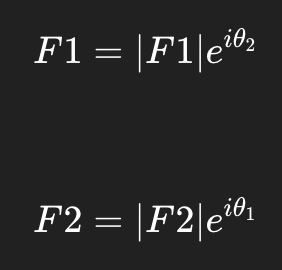

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [132]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

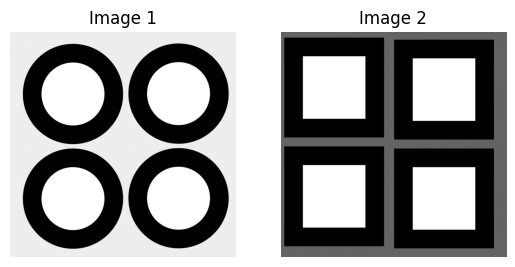

In [133]:
# Loading images and convering to gray

img_path_1 = '/content/drive/MyDrive/Image/circles.png'
img_path_2 = '/content/drive/MyDrive/Image/rectangles.png'

circles = cv2.imread(img_path_1)
circles = cv2.cvtColor(circles, cv2.COLOR_BGR2GRAY)
rectangles = cv2.imread(img_path_2)
rectangles = cv2.cvtColor(rectangles, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(circles, cmap='gray')
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rectangles, cmap='gray')
plt.title("Image 2")
plt.axis('off')

plt.show()


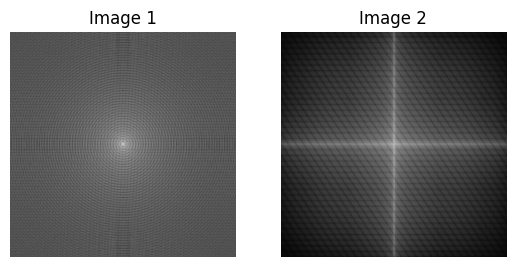

In [134]:
f_shift_circles = np.fft.fftshift(np.fft.fft2(circles))
f_shift_rectangles = np.fft.fftshift(np.fft.fft2(rectangles))


# Circle
magnitude_circles = np.log(1 + np.abs(f_shift_circles))
mag_circles = np.abs(f_shift_circles)
phase_circles = np.angle(f_shift_circles)


# Rectangle
magnitude_rectangles = np.log(1 + np.abs(f_shift_rectangles))
mag_rectangles = np.abs(f_shift_rectangles)
phase_rectangles = np.angle(f_shift_rectangles)

plt.subplot(1, 2, 1)
plt.imshow(magnitude_circles, cmap='gray')
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_rectangles, cmap='gray')
plt.title("Image 2")
plt.axis('off')

plt.show()

In [135]:
# First reconstruction

f_mag_circles = mag_rectangles * np.exp(1j * phase_circles)
f_ishift = np.fft.ifftshift(f_mag_circles)
img_mag = np.fft.ifft2(f_ishift)
img_mag_cicles = np.abs(img_mag)

# Second Reconstruction

f_mag_rectangles = mag_circles * np.exp(1j * phase_rectangles)
f_ishift = np.fft.ifftshift(f_mag_rectangles)
img_mag = np.fft.ifft2(f_ishift)
img_mag_rectangles = np.abs(img_mag)

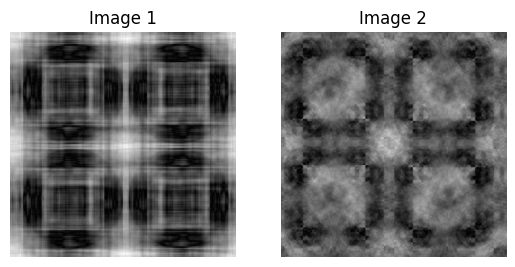

In [136]:
plt.subplot(1, 2, 1)
plt.imshow(img_mag_cicles, cmap='gray')
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_mag_rectangles, cmap='gray')
plt.title("Image 2")
plt.axis('off')

plt.show()

In [137]:
# Yes, its quite clear with the two images how phase and magnitude works, like in first image which has the phase of cirlce marks the black boundary in the circular
# region only and it is same for the rectangular phase which only allows black boundary in the rectangular region.